In [2]:
%load_ext autoreload
%autoreload 2
from DarkMatter import *

Welcome to JupyROOT 6.26/08


## 1. Read PSF file

In [6]:
dwarf = "segue_1"
#irf = ResponseFunction.EventDisplay.readIRFs(dwarf, ext=False)
irf = ResponseFunction.EventDisplay.averagedIRFs(dwarf, ext=True)
PSF = irf.PSF

Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion_norm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).


### - Quick check: what do they look like?

## 2. Get PSF (dP/d$\Omega$) in a specific energy (e.g., 1 TeV)

In [31]:
# EventDisplay
en = 1000
gPSF1D = JProfile.getPSF1D(PSF, en, package="EventDisplay")

### - If you want to check whether PSF is well normailzed, do this (this takes time).

In [32]:
gPSF1D_ED = JProfile.getPSF1D(PSF, en, package="EventDisplay", check=True)

[Log] Getting PSF with energy of:  1000 GeV
[Log] PSF Integral from +/- 2 deg:  1.0002768516026088


(<cppyy.gbl.TCanvas object at 0x7fc7e6dc6cf0>,
 <cppyy.gbl.TH2D object at 0x7fc7e709f800>)

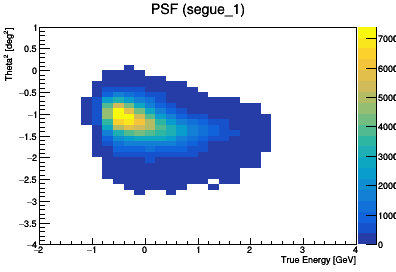

In [33]:
plotRoot(PSF)

(<cppyy.gbl.TCanvas object at 0x7fc7e7895040>,
 <cppyy.gbl.TH2D object at 0x7fc7e70a0e00>)

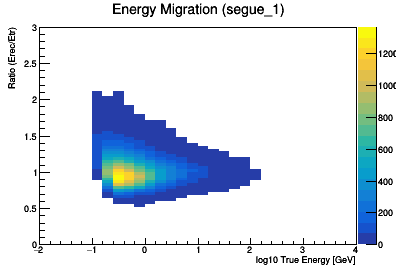

In [38]:
plotRoot(irf.Bias)

### - Quick check

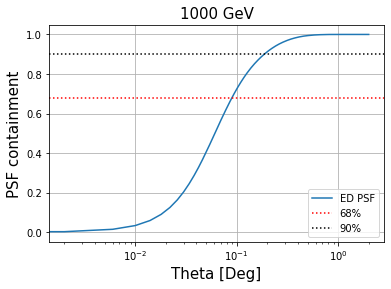

In [7]:
PSF_cont_ED = JProfile.getPSFcont(PSF, en, package="EventDisplay")

plt.plot(*PSF_cont_ED, label="ED PSF")
plt.xscale("log")
plt.xlabel("Theta [Deg]", fontsize=15)
plt.ylabel(r"PSF containment", fontsize=15)
plt.title("{} GeV".format(en), fontsize=15)
plt.grid()
plt.axhline(0.68, color="r", ls=":", label="68%")
plt.axhline(0.90, color="k", ls=":", label="90%")
plt.legend()

## 3. Read J profile

In [7]:

for dwarf in ["UMi"]:

    g_mid = []
    seed_idx = []
    for i in trange(3000):
        seed = random.randint(0,99999)
        seed_idx.append(seed)
        gJProf = JProfile.calcJval(dwarf, seed=seed)
        g_mid.append(gJProf)

    g_mid = np.asarray(g_mid)
    
    g_perc = []
    for i in range(500):
        g_perc.append([g_mid[:,i][0][0], np.percentile(g_mid[:,i][:,1], 50),
                       np.percentile(g_mid[:,i][:,1], 16),
                       np.percentile(g_mid[:,i][:,1], 84)])

    g_perc = np.asarray(g_perc)
    break

  0%|          | 0/3000 [00:00<?, ?it/s]

In [8]:
for dwarf in ["UMi"]:

    g_mid = []
    seed_idx = []
    for i in trange(3000):
        seed = random.randint(0,JProfile.goodPropNum(dwarf)-1)
        seed_idx.append(seed)
        gJProf = JProfile.calcJval(dwarf, seed=seed, general=True)
        g_mid.append(gJProf)

    g_mid = np.asarray(g_mid)
    
    g_perc_g = []
    for i in range(500):
        g_perc_g.append([g_mid[:,i][0][0], np.percentile(g_mid[:,i][:,1], 50),
                       np.percentile(g_mid[:,i][:,1], 16),
                       np.percentile(g_mid[:,i][:,1], 84)])

    g_perc_g = np.asarray(g_perc_g)
    break

  0%|          | 0/3000 [00:00<?, ?it/s]

In [6]:
mass = np.logspace(np.log10(200), 4.5, 8)
for c in ["tt"]:
    ul = Likelihood.combinedExpectedUpperLimits(c, mass=mass, dwarfs = const.ListOfDwarf, ext=True,
                                    package="EventDisplay", method=2, averagedIRF=True, runs=300, seed=20,
                                    returnTS=True, bkgModel="gaus", correction=True, 
                                    addTheta=False)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : tt
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/2400 [00:00<?, ?it/s]

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/dtak/Software/miniconda3/envs/dm/lib/python3.10/site-packages/numpy/core/_methods.p

[4.54612459e+05 4.54612447e+05 4.54612428e+05 4.54612402e+05
 4.54612365e+05 4.54612313e+05 4.54612237e+05 4.54612129e+05
 4.54611975e+05 4.54611755e+05 4.54611442e+05 4.54610994e+05
 4.54610356e+05 4.54609445e+05 4.54608147e+05 4.54606298e+05
 4.54603666e+05 4.54599924e+05 4.54594615e+05 4.54587101e+05
 4.54576507e+05 4.54561646e+05 4.54540949e+05 4.54512413e+05
 4.54473608e+05 4.54421820e+05 4.54354428e+05 4.54269641e+05
 4.54167675e+05 4.54052396e+05 4.53933336e+05 4.53827983e+05
 4.53764352e+05 4.53784196e+05 4.53947517e+05 4.54339358e+05
 4.55080080e+05 4.56340620e+05 4.58364719e+05 4.61500922e+05
 4.66248320e+05 4.73321730e+05 4.83744445e+05 4.98980277e+05
 5.21121705e+05 5.53158234e+05 5.99359413e+05 6.65821649e+05
 7.61248929e+05 8.98067488e+05 1.09401725e+06 1.37442396e+06
 1.77544318e+06 2.34869181e+06 3.16786076e+06 4.33815599e+06
 6.00977767e+06 8.39716470e+06 1.18064703e+07 1.66747890e+07
 2.36261618e+07 3.35515349e+07 4.77229169e+07 6.79563629e+07
 9.68446670e+07 1.380895

ValueError: A value in x_new is below the interpolation range.

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V



Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Po

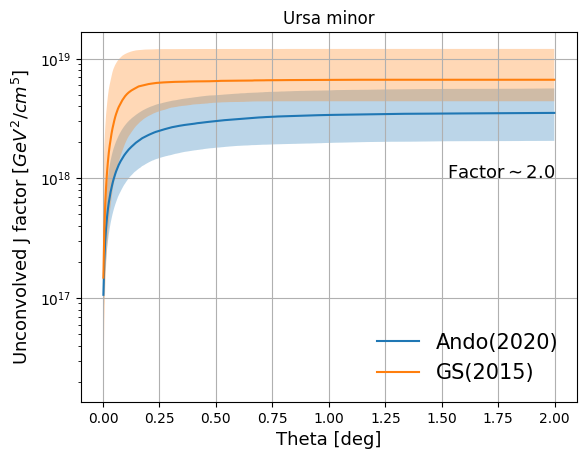

In [10]:
plt.plot(g_perc[:,0],g_perc[:,1], label="Ando(2020)") 
plt.fill_between(g_perc[:,0],g_perc[:,2], g_perc[:,3], alpha=0.3) 
plt.plot(g_perc_g[:,0],g_perc_g[:,1], label="GS(2015)") 
plt.fill_between(g_perc_g[:,0],g_perc_g[:,2], g_perc_g[:,3], alpha=0.3) 
plt.yscale("log")
plt.grid()
plt.legend(loc=4, frameon=False, fontsize=15)
plt.xlabel("Theta [deg]", fontsize=13)
plt.ylabel(r"Unconvolved J factor [$GeV^2/cm^5$]", fontsize=13)
plt.text(2, 1e18, r"Factor$\sim$2.0", ha="right", fontsize=13)
plt.title("Ursa minor")
plt.savefig("UMi_comp.pdf")

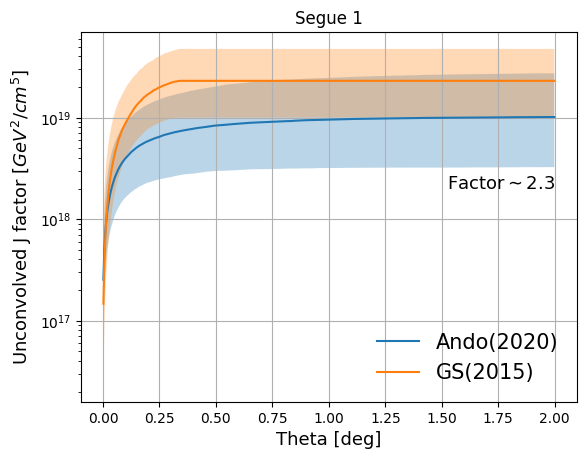

In [6]:
plt.plot(g_perc[:,0],g_perc[:,1], label="Ando(2020)") 
plt.fill_between(g_perc[:,0],g_perc[:,2], g_perc[:,3], alpha=0.3) 
plt.plot(g_perc_g[:,0],g_perc_g[:,1], label="GS(2015)") 
plt.fill_between(g_perc_g[:,0],g_perc_g[:,2], g_perc_g[:,3], alpha=0.3) 
plt.yscale("log")
plt.grid()
plt.legend(loc=4, frameon=False, fontsize=15)
plt.xlabel("Theta [deg]", fontsize=13)
plt.ylabel(r"Unconvolved J factor [$GeV^2/cm^5$]", fontsize=13)
plt.text(2, 2e18, r"Factor$\sim$2.3", ha="right", fontsize=13)
plt.title("Segue 1")
plt.savefig("Segue_1_comp.pdf")

### - Full set of parameters

### - Quick check

Text(0, 0.5, 'J profile [GeV$^2$ cm$^{-5}$]')

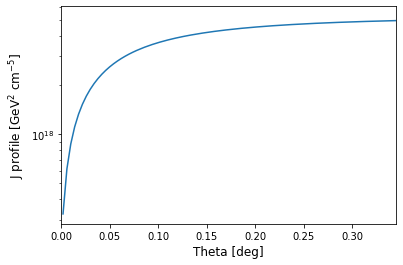

In [6]:
dwarf = "Segue_1"
J = JProfile.calcJval(dwarf)
plt.plot(J[:,0], J[:,1])
plt.yscale("log")
plt.xlabel("Theta [deg]", fontsize=12)
plt.xlim(0, JProfile.getThMax(dwarf))
plt.ylabel(r"J profile [GeV$^2$ cm$^{-5}$]", fontsize=12)

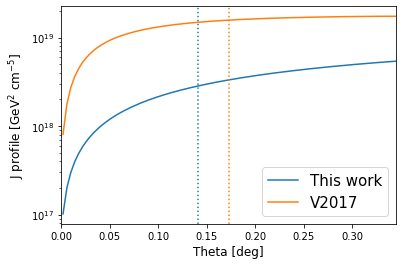

In [13]:
dwarf = "Segue_1"
J = JProfile.calcJval(dwarf)
etc = plt.plot(J[:,0], J[:,1], label="This work")
plt.axvline(np.sqrt(0.02), ls=":", color=etc[0].get_color())
J = JProfile.calcJval(dwarf, seed='b', general=True)
etc = plt.plot(J[:,0], J[:,1], label="V2017")
plt.axvline(np.sqrt(0.03), ls=":", color=etc[0].get_color())
plt.yscale("log")
plt.xlabel("Theta [deg]", fontsize=12)
plt.xlim(0, JProfile.getThMax(dwarf))
plt.ylabel(r"J profile [GeV$^2$ cm$^{-5}$]", fontsize=12)
plt.legend(fontsize=15)

### - Quick check: Compare PSF with J profile

In [5]:
total_J = {}
theta = np.linspace(0, 2, 100)
for dwarf in ["segue_1", "bootes", "draco", "ursa_minor"]:
    gJProf = JProfile.calcJProfile(dwarf, seed = const.defaultNum[dwarf])
    total_J[dwarf] = np.asarray(JProfile.calcJval(dwarf, gJProf = gJProf))

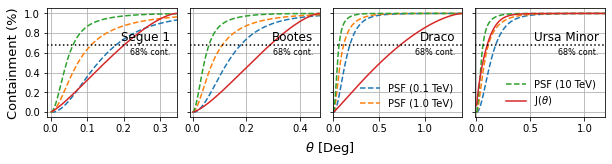

In [8]:
f, ax = plt.subplots(1,4, figsize=(10, 2), sharey=True, gridspec_kw=dict(wspace=0.1) )

dwarfName = ["Segue 1", "Bootes", "Draco", "Ursa Minor"]
for k, dwarf in enumerate(["segue_1", "bootes", "draco", "ursa_minor"]):
    
    thMax = JProfile.getThMax(dwarf)
    for en in [100, 1000, 10000]:
        PSF_cont = JProfile.getPSFcont(PSF, en)
        if dwarf == "segue_1":
            i, j = 0, 0
        elif dwarf == "ursa_minor":
            i, j = 1, 0
        elif dwarf == "draco":
            i, j = 0, 1
        else:
            i, j = 1, 1
        i=k
        if i == 2 and (en == 100 or en ==1000):
            ax[i].plot(PSF_cont[0], PSF_cont[1]/max(PSF_cont[1]),ls = "--", label="PSF ({:.1f} TeV)".format(en/1000.))
        elif i == 3 and en == 10000:
            ax[i].plot(PSF_cont[0], PSF_cont[1]/max(PSF_cont[1]),ls = "--", label="PSF (10 TeV)".format(en/1000.))
        else:
            ax[i].plot(PSF_cont[0], PSF_cont[1]/max(PSF_cont[1]),ls = "--")
    if i == 3:
        ax[i].plot(total_J[dwarf][0], total_J[dwarf][1]/max(total_J[dwarf][1]), label=r"J($\theta$)")
    else:
        ax[i].plot(total_J[dwarf][0], total_J[dwarf][1]/max(total_J[dwarf][1]))
    ax[i].text(0.95, 0.7, dwarfName[k], ha="right", fontsize=12, transform = ax[i].transAxes)
    ax[i].text(0.95, 0.57, "68% cont.", ha="right", fontsize=8, transform = ax[i].transAxes)
    
    ax[i].grid(which="major")
    ax[i].grid(which="minor", ls=":")
    ax[i].set_xlim(-0.01, thMax)
    ax[i].axhline(0.68, color="k", ls=":")
    ax[i].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    if i !=0:
        ax[i].set_yticklabels([])
    
    ax[i].set_ylim(-0.05, 1.05)
ax[0].set_yticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"])
ax[0].set_ylabel(r"Containment (%)", fontsize=13)
ax[1].text(0.6, -0.4, r"$\theta$ [Deg]", ha="right", fontsize=13)
ax[2].legend(frameon=False)
ax[3].legend(frameon=False)
#plt.tight_layout()

plt.savefig("chi", dpi=300)

In [61]:
prop_table = JProfile.NFWdwarfParam("Segue_1")

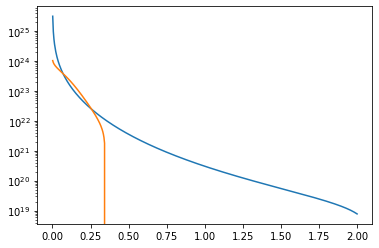

In [72]:
plt.plot(*JProfile.calcJProfile("Segue_1").T)
plt.plot(*JProfile.calcJProfile("Segue_1", general=True).T)
plt.yscale("log")

In [80]:
JProfile.calcJProfile("Segue_1", verbose=True)
JProfile.calcJProfile("Segue_1", verbose=True, general=True)

[Log] J profile is 1.5e+18.


array([[2.00000000e-03, 5.35389273e+24],
       [6.00000000e-03, 1.59840286e+24],
       [1.00000000e-02, 8.73665395e+23],
       [1.40000000e-02, 5.73508990e+23],
       [1.80000000e-02, 4.12346310e+23],
       [2.20000000e-02, 3.13234580e+23],
       [2.60000000e-02, 2.46930807e+23],
       [3.00000000e-02, 1.99949855e+23],
       [3.40000000e-02, 1.65237865e+23],
       [3.80000000e-02, 1.38760508e+23],
       [4.20000000e-02, 1.18051086e+23],
       [4.60000000e-02, 1.01521024e+23],
       [5.00000000e-02, 8.81038523e+22],
       [5.40000000e-02, 7.70588209e+22],
       [5.80000000e-02, 6.78565981e+22],
       [6.20000000e-02, 6.01097209e+22],
       [6.60000000e-02, 5.35286576e+22],
       [7.00000000e-02, 4.78931482e+22],
       [7.40000000e-02, 4.30329832e+22],
       [7.80000000e-02, 3.88147977e+22],
       [8.20000000e-02, 3.51328010e+22],
       [8.60000000e-02, 3.19021464e+22],
       [9.00000000e-02, 2.90541055e+22],
       [9.40000000e-02, 2.65325046e+22],
       [9.800000

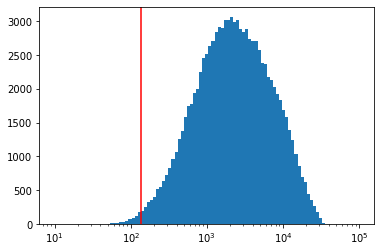

In [68]:
plt.hist(prop_table["rt"], np.logspace(1, 5, 100))
plt.axvline(138, c="r")
plt.xscale("log")

In [27]:
dwarfName = ["Segue 1", "Ursa Minor", "Draco", "Bootes", ]
for k, dwarf in enumerate(["segue_1","ursa_minor", "draco", "bootes"]):
    plt.plot(total_J[dwarf][:,0], total_J[dwarf][:,1]/max(total_J[dwarf][:,1]), label=dwarfName[k])

plt.ylabel(r"Containment (%)", fontsize=13)
plt.xlabel(r"$\theta$ [Deg]", fontsize=13)
plt.grid()
plt.legend(fontsize=12)

NameError: name 'total_J' is not defined

### - Quick check: Check the systematic error

In [30]:
dwarf = "Segue_1"

J_sim = []
for i in trange(1000):
    J = JProfile.calcJval(dwarf)
    J_sim += [list(J[:,1])]

theta = J[:,0]
J_sim = np.asarray(J_sim).T
J_cont = J_sim/J_sim[-1]
J_sys = []
J_sys_cont = []
for i, (J, Jc) in enumerate(zip(J_sim, J_cont)):
    J_sys.append([np.percentile(J, 50), np.percentile(J, 16), np.percentile(J, 84)])
    J_sys_cont.append([np.percentile(Jc, 50), np.percentile(Jc, 16), np.percentile(Jc, 84)])
J_sys = np.asarray(J_sys)
J_sys_cont = np.asarray(J_sys_cont)

  0%|          | 0/1000 [00:00<?, ?it/s]

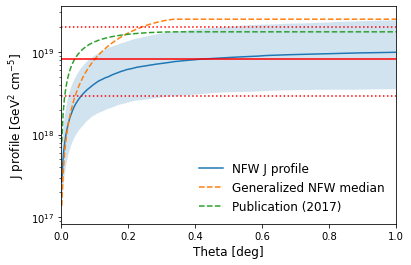

In [47]:
f, ax = plt.subplots()
ax.plot(theta, J_sys[:,0], label="NFW J profile")

J_test = JProfile.calcJval(dwarf, seed=defaultNum["segue_1"], general=True)
ax.plot(J_test[:,0], J_test[:,1], ls="--", label="Generalized NFW median")
gJProf = JProfile.calcJProfile(dwarf, seed='b', general=True)
J_ben = JProfile.calcJval(dwarf, gJProf=gJProf)
ax.plot(J_ben[:,0], J_ben[:,1], ls="--", label="Publication (2017)")

ax.fill_between(theta, J_sys[:,1], J_sys[:,2], alpha=0.2)
ax.set_yscale("log")
ax.set_xlabel("Theta [deg]", fontsize=12)
ax.set_xlim(0, 1)

ax.set_ylabel(r"J profile [GeV$^2$ cm$^{-5}$]", fontsize=12)
ax.legend(loc=4, frameon=False, fontsize=12)

ax.axhline(10**18.92, color="r", label="values from Ando et al.")
ax.axhline(10**(18.92+0.38), color="r", ls=":")
ax.axhline(10**(18.92-0.45), color="r", ls=":")

## 4. Convolution between the J profile and PSF

### - Calculate a 2D radial J profile for a given energy and its integration.

#### * Hankel method

In [51]:
package="EventDisplay"
dwarf = "Segue_1"
energies = 1000
irf = ResponseFunction.EventDisplay.readIRFs(dwarf, ext=True)
gJProf = JProfile.calcJProfile(dwarf)
J, J2D = JProfile.calcHKConvJProf2D(gJProf, irf.PSF, energies, package="EventDisplay", ext=True, verbose=True)

[Log] Convolved J profile in 1.000 TeV: 4.32e+17


In [82]:
package="EventDisplay"
dwarf = "ComBer"
energies = np.logspace(2, 4.5, 20)
J_tot2 = []
irf = ResponseFunction.EventDisplay.readIRFs(dwarf, ext=True)
gJProf = JProfile.calcJProfile(dwarf, seed=0)
for en in energies:
    J, J2D = JProfile.calcHKConvJProf2D(gJProf, irf.PSF, en, package="EventDisplay", ext=True, verbose=True)
    J_tot2.append(J)

[Log] Convolved J profile in 0.100 TeV: 1.90e+18
[Log] Convolved J profile in 0.135 TeV: 1.99e+18
[Log] Convolved J profile in 0.183 TeV: 2.02e+18
[Log] Convolved J profile in 0.248 TeV: 2.05e+18
[Log] Convolved J profile in 0.336 TeV: 2.13e+18
[Log] Convolved J profile in 0.455 TeV: 2.22e+18
[Log] Convolved J profile in 0.616 TeV: 2.30e+18
[Log] Convolved J profile in 0.834 TeV: 2.38e+18
[Log] Convolved J profile in 1.129 TeV: 2.47e+18
[Log] Convolved J profile in 1.528 TeV: 2.56e+18
[Log] Convolved J profile in 2.069 TeV: 2.66e+18
[Log] Convolved J profile in 2.801 TeV: 2.75e+18
[Log] Convolved J profile in 3.793 TeV: 2.82e+18
[Log] Convolved J profile in 5.135 TeV: 2.87e+18
[Log] Convolved J profile in 6.952 TeV: 2.91e+18
[Log] Convolved J profile in 9.412 TeV: 2.93e+18
[Log] Convolved J profile in 12.743 TeV: 2.94e+18
[Log] Convolved J profile in 17.252 TeV: 2.95e+18
[Log] Convolved J profile in 23.357 TeV: 2.94e+18
[Log] Convolved J profile in 31.623 TeV: 2.94e+18


#### * Brute-force method

In [102]:
package="EventDisplay"
dwarf = "segue_1"
energies = np.logspace(2, 4.5, 20)
J_tot = []
irf = ResponseFunction.EventDisplay.readIRFs(dwarf, ext=True)
gJProf = calcJProfile_old(dwarf, seed=defaultNum[dwarf])
for en in tqdm(energies):
    gPSF = getPSF1D(irf.PSF, en, package=package)
    hJ, J = calcConvJProf2D(gJProf, gPSF, package=package, ext=True)
#    gRadJProf, J2 = getRadialConvJProf(hJ, energy=en, package=package, thCut=np.sqrt(0.008))
    print(J)
    J_tot.append(J)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1003 [00:00<?, ?it/s]

8.596358078930198e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

8.678639081336536e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

8.74483120184741e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

8.927382401353475e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

9.094372095871138e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

9.310092556755857e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

9.515671156416166e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

9.73426891630048e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

9.930584422363015e+18


  0%|          | 0/1003 [00:00<?, ?it/s]

1.01404702584971e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.0385642263925088e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.0570860672268024e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.0726146298014548e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.0874225186000833e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.0972795505081029e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.1069599702434271e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.1135134395740439e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.1136831407316552e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.1150643301758194e+19


  0%|          | 0/1003 [00:00<?, ?it/s]

1.1185168238383534e+19


Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProf2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv1D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hProfConv (Potential memory leak).
Warning in <TROOT::Append>: Replacing exist

Text(0, 0.5, 'Convolved J profile ')

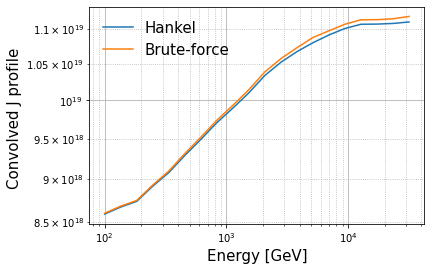

In [110]:
plt.plot(energies, J_tot2, label="Hankel")
plt.plot(energies, J_tot, label="Brute-force")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.grid(which="minor", ls=":")
plt.legend(fontsize=15, frameon=False)
plt.xlabel("Energy [GeV]", fontsize=15)
plt.ylabel("Convolved J profile ", fontsize=15)

### - Quick check 1: What do they look like?

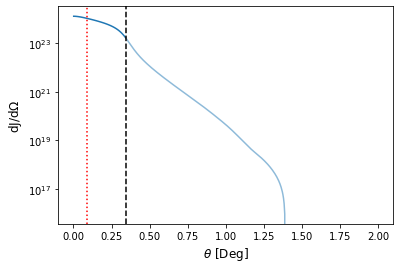

In [3]:
thMax = JProfile.getThMax(dwarf)
etc = plt.plot(J2D[:,0][J2D[:,0]<thMax], J2D[:,1][J2D[:,0]<thMax])
plt.plot(J2D[:,0][J2D[:,0]>thMax], J2D[:,1][J2D[:,0]>thMax], color=etc[0].get_color(), alpha=0.5)
plt.xlabel(r"$\theta$ [Deg]", fontsize=12)
plt.ylabel(r"dJ/d$\Omega$", fontsize=12)
plt.yscale("log")
plt.axvline(defineThetaCut(package, 0), color="r", ls=":")
plt.axvline(JProfile.getThMax(dwarf), color="k", ls="--")

### - Quick check 2: Consistency between 1D and 2D profiles.

In [4]:
J2 = JProfile.convert2Dto1D(J2D)
print("[Log] Converted J profile: {:.2e}".format(J2))
print("J factor ratio: {:.2f}%".format(abs(J2-J)/J*100))

[Log] Converted J profile: 9.08e+18
J factor ratio: 0.00%


## 5. Preparation for moving to the next step

In [53]:
dwarf = "Segue_1"
package="EventDisplay"


J1, J2 = JProfile.generateConvolvedJ(dwarf, package, version="all",  verbose=True, save_root=True, ext=True, return_array=True)

  0%|          | 0/30 [00:00<?, ?it/s]

[Log] Finish. J profile is saved in /Users/dtak/Research/DarkMatter/Output//JProfile_EventDisplay_Segue_1_ext.root.


### - Quick check: What do 1D and 2D convolved J profiles look like?

(<cppyy.gbl.TCanvas object at 0x7f843a2321a0>,
 <cppyy.gbl.TGraph2D object at 0x600000340870>)

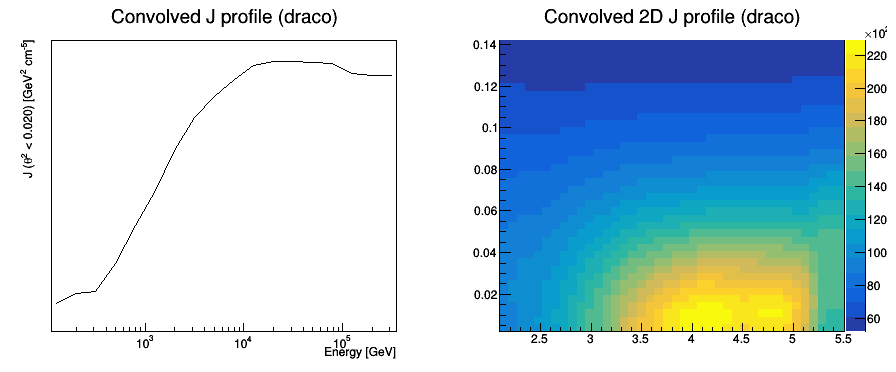

In [54]:
dwarf = "draco"
File = TFile(OUTPUT_DIR+f"/JProfile_EventDisplay_{dwarf}_ext.root")
File.gConvJ1D.SetTitle(f"Convolved J profile ({dwarf})")
File.gConvJ2D.SetTitle(f"Convolved 2D J profile ({dwarf})")
plotRoot(File.gConvJ1D, File.gConvJ2D, logx=True, logy=True)

### - Quick check: Are they consistent?

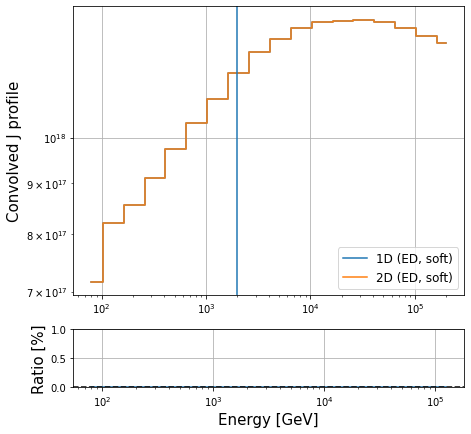

In [59]:
JProfile.checkSanity(OUTPUT_DIR+"/JProfile_EventDisplay_Segue_1_ext.root")

### - Quick check: Check consistenacy between VEGAS and ED

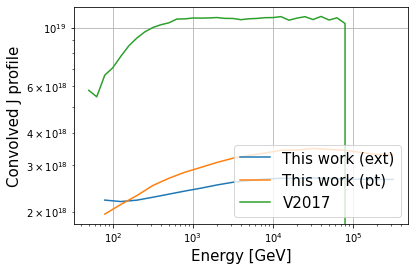

In [26]:
File_v = TFile(OUTPUT_DIR+"/JProfile_VEGAS_segue_1.root")
File_s = TFile(OUTPUT_DIR+"/JProfile_EventDisplay_segue_1_ext.root")
File_s2 = TFile(OUTPUT_DIR+"/JProfile_EventDisplay_segue_1.root")

J1D_xv, J1D_yv = getArray(File_v.gConvJvE)
J1D_xs, J1D_ys = getArray(File_s.gConvJ1D)
J1D_xs2, J1D_ys2 = getArray(File_s2.gConvJ1D)

plt.plot(J1D_xs, J1D_ys, label="This work (ext)")
plt.plot(J1D_xs2, J1D_ys2, label="This work (pt)")
plt.plot(J1D_xv, J1D_yv, label="V2017")

plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy [GeV]", fontsize=15)
plt.ylabel(r"Convolved J profile", fontsize=15)
plt.legend(fontsize=15, loc=4)

### - Quick check: Check the systematic error

In [2]:
dwarf = "draco"
package="EventDisplay"

J_conv_sim = []
J_conv_sim_2D = []

for i in trange(1000):
    J1, J2 = JProfile.generateConvolvedJ(dwarf, package, version="all", verbose=False, save_root=False, return_array=True, ext=True)
    J_conv_sim += [list(J1[:,1])]
    J_conv_sim_2D.append(J2)


np.save(dwarf+"_jprofile_1d", J_conv_sim)
np.save(dwarf+"_jprofile_2d", J_conv_sim_2D)

In [26]:
dwarf = "bootes"

J_conv_sim = np.load("{}_jprofile_1d.npy".format(dwarf))
J_conv_sim_2D = np.load("{}_jprofile_2d.npy".format(dwarf), allow_pickle=True)

energies = list(J_conv_sim_2D[0].keys())

theta = J_conv_sim_2D[0][energies[0]][:,0]

# for calculating 1 sigma region for 1D
J_conv_sys = []
J_percentile_idx = []
for i, e in enumerate(energies):
    J_conv_sys.append([e, np.average(J_conv_sim[:,i]), np.percentile(J_conv_sim[:,i], 16, interpolation="nearest"), np.percentile(J_conv_sim[:,i], 84, interpolation="nearest")])
    J_percentile_idx.append([np.where(J_conv_sim[:,i]==np.percentile(J_conv_sim[:,i], 16, interpolation="nearest"))[0][0], np.where(J_conv_sim[:,i]==np.percentile(J_conv_sim[:,i], 84, interpolation="nearest"))[0][0]])
J_conv_sys = np.asarray(J_conv_sys)

# for calculating 1 sigma region for 2D
J_conv_sys_2D = []
for j, th in enumerate(theta):
    J_1D = []
    for k, e in enumerate(energies):
        temp = []
        for m in range(1000):
            temp.append(J_conv_sim_2D[m][e][j][1])
        J_1D.append([e, th, np.average(temp), J_conv_sim_2D[J_percentile_idx[k][0]][e][j][1], J_conv_sim_2D[J_percentile_idx[k][1]][e][j][1]])

    J_conv_sys_2D.append(J_1D)
    
J_conv_sys_2D=np.asarray(J_conv_sys_2D)

In [27]:
file = TFile("J_profile_4_Chiara.root", "UPDATE")
for label, index in zip(["median", "low", "up"], [1, 2, 3]):
    convJ1D = TGraph()
    convJ2D = TGraph2D()
    
    convJ1D.SetName("{}_1D_{}".format(dwarf, label))
    convJ1D.SetTitle("Convolved J profile ({})".format(label))
    convJ1D.GetXaxis().SetTitle("Energy [GeV]");
    convJ1D.GetYaxis().SetTitle(r"J [GeV^{{2}} cm^{{-5}}]");

    convJ2D.SetName("{}_2D_{}".format(dwarf, label))
    convJ2D.SetTitle("Convolved 2D J profile ({})".format(label))
    convJ2D.GetXaxis().SetTitle("Energy [GeV]")
    convJ2D.GetYaxis().SetTitle("Theta [Deg]")
    
    for i, j in enumerate(J_conv_sys):
        convJ1D.SetPoint(i, j[0], j[index])
    convJ1D.Write()

    k=0
    for n, J in enumerate(J_conv_sys_2D):
        for m, jp in enumerate(J):
            convJ2D.SetPoint(k, np.log10(jp[0]), round(jp[1],3), jp[index+1])
            k+=1
    convJ2D.Write()
file.Close()

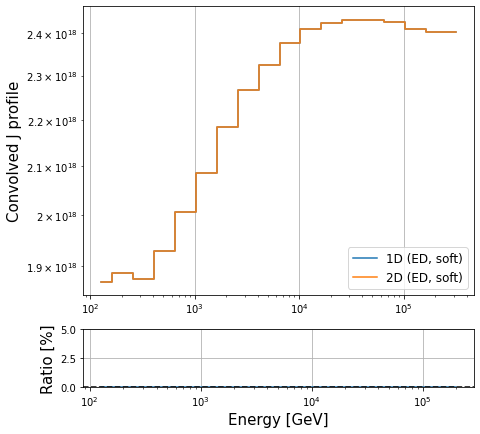

In [12]:
J1D_x, J1D_y = getArray(convJ1D)
raw_J2D = convJ2D
J2D_y, e = JProfile.convert2Dto1D_multi(raw_J2D, package="EventDisplay", ext=True)

f, ax = plt.subplots(2,1, figsize=(7, 7), gridspec_kw={'height_ratios':[5,1]})
ax[0].step(J1D_x, J1D_y, where="mid", label="1D (ED, soft)")
ax[0].step(J1D_x, J2D_y, where="mid", label="2D (ED, soft)")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
#ax[0].set_ylim(1e18, )
ax[0].set_ylabel(r"Convolved J profile", fontsize=15)
ax[0].legend(fontsize=12, loc=4)
ax[0].grid()

ax[1].plot(J1D_x[:-1], np.nan_to_num(abs(J1D_y[:-1]-J2D_y[:-1])/J2D_y[:-1]*100), label="2D/1D (soft)")
ax[1].set_xscale("log")
ax[1].set_xlabel("Energy [GeV]", fontsize=15)
ax[1].set_ylabel("Ratio [%]", fontsize=15)
ax[1].set_ylim(0, 5)
ax[1].axhline(0, color="k", ls="--")
ax[1].grid()

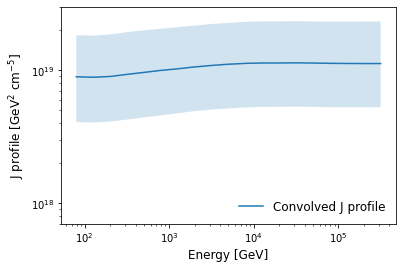

In [5]:
seed=43
f, ax = plt.subplots()
ax.plot(energies, J_conv_sys[:,0], label="Convolved J profile")
ax.fill_between(energies, J_conv_sys[:,1], J_conv_sys[:,2], alpha=0.2)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Energy [GeV]", fontsize=12)
ax.set_ylim(7e17, 3e19)
ax.set_ylabel(r"J profile [GeV$^2$ cm$^{-5}$]", fontsize=12)
ax.legend(loc=4, frameon=False, fontsize=12)

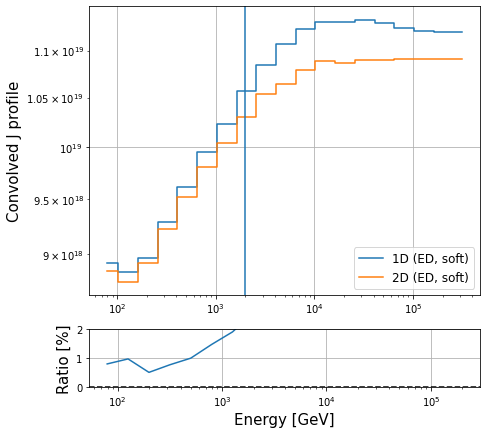

In [99]:
J1D_x, J1D_y = getArray(File.segue_1_1D_median)
raw_J2D = File.segue_1_2D_median
J2D_y, J2D_x = JProfile.convert2Dto1D_multi(raw_J2D, package="EventDisplay", ext=True)

f, ax = plt.subplots(2,1, figsize=(7, 7), gridspec_kw={'height_ratios':[5,1]})
ax[0].step(J1D_x, J1D_y, where="mid", label="1D (ED, soft)")
ax[0].step(J1D_x, J2D_y, where="mid", label="2D (ED, soft)")
ax[0].axvline(J1D_x[7])
ax[0].set_xscale("log")
ax[0].set_yscale("log")
#ax[0].set_ylim(1e18, )
ax[0].set_ylabel(r"Convolved J profile", fontsize=15)
ax[0].legend(fontsize=12, loc=4)
ax[0].grid()

ax[1].plot(J1D_x[:-1], np.nan_to_num(abs(J1D_y[:-1]-J2D_y[:-1])/J2D_y[:-1]*100), label="2D/1D (soft)")
ax[1].set_xscale("log")
ax[1].set_xlabel("Energy [GeV]", fontsize=15)
ax[1].set_ylabel("Ratio [%]", fontsize=15)
ax[1].set_ylim(0, 2)
ax[1].axhline(0, color="k", ls="--")
ax[1].grid()

(1e-25, 1e-21)

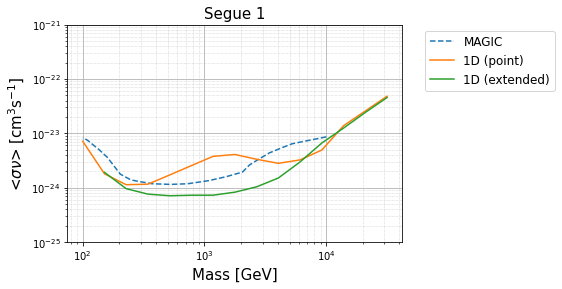

In [42]:
Likelihood.plotULcurve("MAGIC")
#plt.plot(x,y, label="Chiara(1D)")
#plt.plot(x2,y2, label="Chiara(2D)")
Likelihood.plotULcurve("EventDisplay_segue_1_tt_1D_ex", label="1D (point)")
#Likelihood.plotULcurve("EventDisplay_segue_1_tt_2D_ex", label="2D (point)")
Likelihood.plotULcurve("ext_test_1d", label="1D (extended)")
#Likelihood.plotULcurve("ext_test_2d", label="2D (extended)")
#Likelihood.plotULcurve("ext_test_2d_ave", label="2D (aved IRF)")

plt.title("Segue 1", fontsize=15)
plt.ylim(1e-25, 1e-21)

(1e-25, 1e-21)

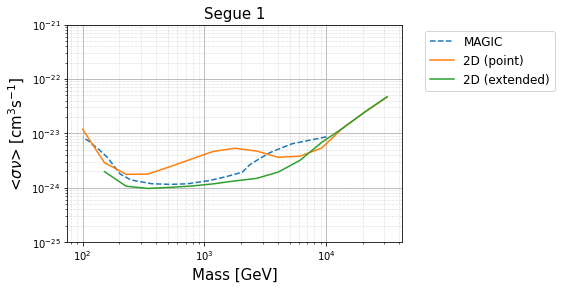

In [43]:
Likelihood.plotULcurve("MAGIC")
#plt.plot(x,y, label="Chiara(1D)")
#plt.plot(x2,y2, label="Chiara(2D)")
#Likelihood.plotULcurve("EventDisplay_segue_1_tt_1D_ex", label="1D (point)")
Likelihood.plotULcurve("EventDisplay_segue_1_tt_2D_ex", label="2D (point)")
#Likelihood.plotULcurve("ext_test_1d", label="1D (extended)")
Likelihood.plotULcurve("ext_test_2d", label="2D (extended)")
#Likelihood.plotULcurve("ext_test_2d_ave", label="2D (aved IRF)")

plt.title("Segue 1", fontsize=15)
plt.ylim(1e-25, 1e-21)

(1e-25, 1e-21)

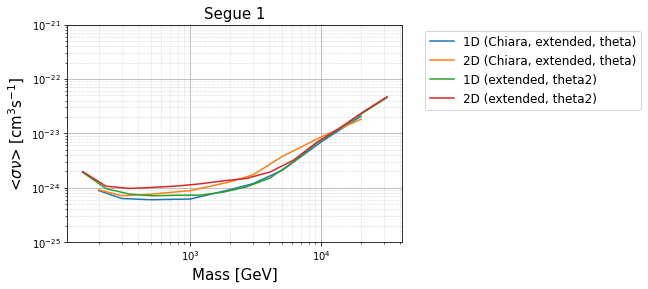

In [123]:
#Likelihood.plotULcurve("MAGIC")
File = TFile(DM_DIR+"/temp/segue1_median_test_50.root", "READ")
oned = File.UpperLimits.Get("1DUpperLimits")
twod = File.UpperLimits.Get("2DUpperLimits")
x, y = getArray(oned)
plt.plot(x,y, label="1D (Chiara, extended, theta)")
x2, y2 = getArray(twod)
plt.plot(x2,y2, label="2D (Chiara, extended, theta)")
#Likelihood.plotULcurve("EventDisplay_segue_1_tt_1D_ex", label="1D (point, soft)")
#Likelihood.plotULcurve("EventDisplay_segue_1_tt_2D_ex", label="2D (point, soft)")
Likelihood.plotULcurve("ext_test_1d", label="1D (extended, theta2)")
Likelihood.plotULcurve("ext_test_2d", label="2D (extended, theta2)")
#Likelihood.plotULcurve("ext_test_2d_ave", label="2D (aved IRF)")

plt.title("Segue 1", fontsize=15)
plt.ylim(1e-25, 1e-21)